In [1]:
import ipyparallel as ipp

from ipyparallel import Cluster
c = await Cluster(engines="mpi", profile="myprofile").start_and_connect(n=4, activate=True)
c.ids

Starting 4 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/4 [00:00<?, ?engine/s]

[0, 1, 2, 3]

In [3]:
%%px
from ngsolve import *
from ngsolve.webgui import Draw
import ngsolve as ngs
import NgsAMG as amg
import matplotlib.pyplot as plt

### H1

It works, I guess.

In [4]:
%%px
from usrMtgStuffPar import setupH1Square, testAndSolve
from usrMtgPetscStuff import *

V, a, f, u = setupH1Square(maxh=0.01, nref=1)

c = Preconditioner(a, "NgsAMG.h1_scal", ngs_amg_crs_alg="spw")

a.Assemble()
f.Assemble()

testAndSolve(a.mat, c, u.vec, f.vec)

if MPI.COMM_WORLD.size == 1:
    ngsolve.webgui.Draw(u)

[stdout:0] Set up AMG-levels...
 map maps 46749 -> 7892, fac 0.168816
 map maps 7892 -> 1263, fac 0.160035
 map maps 1263 -> 202, fac 0.159937
 map maps 202 -> 35, fac 0.173267
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.2009
Operator complexity: 1.47323
Vertex complexity components: 1 0.168816 0.0270166 0.00432095 0.000748679 
Operator complexity components: 1 0.363089 0.0944382 0.0137644 0.00194317 
# vertices 46749 7892 1263 202 35 
# edges: 139444 23454 3660 558 87 
# procs: 4 2 2 2 2 
NZEs:326785 118652 30861 4498 635 
 ---------- AMG Summary End ---------- 

Preconditioner test:
   min EV = 0.3304577170729749
   max EV = 0.9958542003503625
   condition = 3.0135601285729647


Solve...
CG iteration 1, residual = 0.11989646569361262     
CG iteration 2, residual = 0.03823129236294249     
CG iteration 3, residual = 0.01069081081004832     
CG iteration 4, residual = 0.003088792157736213     
CG iteration 5, residual = 0.0008112612468581138  

In [5]:
%%px

cp = petscGAMGH1Precond(a)

testAndSolve(a.mat, cp, u.vec, f.vec)

[stdout:0] PETSc GAMG setup = 0.09625878231874298
Preconditioner test:
   min EV = 0.5123866203770109
   max EV = 0.9960238544756814
   condition = 1.9438912236678103


Solve...
CG iteration 1, residual = 0.1464875706519976     
CG iteration 2, residual = 0.032316523334203553     
CG iteration 3, residual = 0.004329330265308112     
CG iteration 4, residual = 0.0007044896937679406     
CG iteration 5, residual = 0.00012085169197880484     
CG iteration 6, residual = 2.14069684020581e-05     
CG iteration 7, residual = 3.7866568797665166e-06     
CG iteration 8, residual = 6.026528109669547e-07     
CG iteration 9, residual = 9.879892747688988e-08     

time AMG setup = 0.08837168975572308 sec
    set up  133337.38477301097 DOFS/(sec n* NP)
time solve = 0.009864182640259697 sec
    solved  1194549.0498024456 DOFS/(sec * NP)


Out[1:4]: 1.9438912236678103

Out[3:4]: 1.9438912236678103

Out[0:4]: 1.9438912236678103

Out[2:4]: 1.9438912236678103

### Elasticity

In [6]:
%%px
from usrMtgStuffPar import setupElastBeam, testAndSolve
from usrMtgPetscStuff import *

V, a, f, u = setupElastBeam(N=10, dim=3)

c = Preconditioner(a, f"NgsAMG.elast_{V.mesh.dim}d", ngs_amg_crs_alg="mis")
a.Assemble()
f.Assemble()

testAndSolve(a.mat, c, u.vec, f.vec)

if MPI.COMM_WORLD.size == 1:
    ngsolve.webgui.Draw(u, deformation=True)

[stdout:0] Set up AMG-levels...
 map maps 12221 -> 843, fac 0.0689796
 map maps 843 -> 68, fac 0.0806643
 map maps 68 -> 6, fac 0.0882353
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.07503
Operator complexity: 1.59289
Vertex complexity components: 1 0.0689796 0.00556419 0.000490958 
Operator complexity components: 1 0.562303 0.0298615 0.000720133 
# vertices 12221 843 68 6 
# edges: 76420 4692 251 5 
# procs: 4 2 2 2 
NZEs:166636 23425 1244 30 
 ---------- AMG Summary End ---------- 

Preconditioner test:
   min EV = 0.1497012366634115
   max EV = 0.9980309583753255
   condition = 6.666818395223413


Solve...
CG iteration 1, residual = 0.00041082783046285945     
CG iteration 2, residual = 0.00023339069145644756     
CG iteration 3, residual = 8.580615934205563e-05     
CG iteration 4, residual = 4.024228235243495e-05     
CG iteration 5, residual = 1.9623531814128364e-05     
CG iteration 6, residual = 9.304030256394593e-06     
CG iteration 7,

In [8]:
%%px
cp = petscGAMGElasticityPrecond(a)

testAndSolve(a.mat, cp, u.vec, f.vec, isPETSc=True)

if MPI.COMM_WORLD.size == 1:
    ngsolve.webgui.Draw(u, deformation=True)

[stdout:0] PETSc GAMG setup = 0.11346564539518028
Preconditioner test:
   min EV = 0.2308023590897268
   max EV = 0.9981648673869123
   condition = 4.324760246488059


Solve...
CG iteration 1, residual = 0.00048696038608138516     
CG iteration 2, residual = 0.00020912417008441876     
CG iteration 3, residual = 7.105727458632225e-05     
CG iteration 4, residual = 2.5971583003543306e-05     
CG iteration 5, residual = 8.92911840190126e-06     
CG iteration 6, residual = 2.919526287750718e-06     
CG iteration 7, residual = 1.1081879916501427e-06     
CG iteration 8, residual = 4.1768385496439934e-07     
CG iteration 9, residual = 1.5520313477818846e-07     
CG iteration 10, residual = 5.823851963983256e-08     
CG iteration 11, residual = 1.872863265543201e-08     
CG iteration 12, residual = 5.4861529004471286e-09     
CG iteration 13, residual = 1.7604522382841376e-09     
CG iteration 14, residual = 5.769877346730087e-10     
CG iteration 15, residual = 1.7704199752746306e-10     

#### No silver bullet

Similar limitations as PETSc, BoomerAMG, etc - problems with
 * geometries with extremely bad aspect ratio 
 * stretched p2 elements
 * almost incompressibility

In [9]:
%%px
from usrMtgStuffPar import setupElastBeam, testAndSolve
from usrMtgPetscStuff import *

def getKappas(aRatio, extraArgs={}):
    V, a, f, u = setupElastBeam(N=5, aRatio=aRatio, dim=2)

    c = Preconditioner(a, f"NgsAMG.elast_{V.mesh.dim}d", **extraArgs)

    a.Assemble()

    cpc = petscGAMGElasticityPrecond(a)
    
    evsA = ngs.la.EigenValues_Preconditioner(mat=a.mat, pre=c)
    kappaA = evsA[-1]/evsA[0]

    evsB = ngs.la.EigenValues_Preconditioner(mat=a.mat, pre=cpc)
    kappaB = evsB[-1]/evsB[0]

    if MPI.COMM_WORLD.rank == 0:
        print(f"aspect ratio = {aRatio}, kappa NGS = {kappaA}, kappa PETSc = {kappaB}")
    
    return kappaA, kappaB

In [10]:
%%px
ratios = [1,5,10,20,50,100,200,500,1000]
kappas = [ getKappas(r) for r in ratios ]

[stdout:0] Set up AMG-levels...
 map maps 36 -> 6, fac 0.166667
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.16667
Operator complexity: 1.24894
Vertex complexity components: 1 0.166667 
Operator complexity components: 1 0.248936 
# vertices 36 6 
# edges: 85 10 
# procs: 4 2 
NZEs:235 26 
 ---------- AMG Summary End ---------- 

PETSc GAMG setup = 0.0026445516353786674
aspect ratio = 1, kappa NGS = 11.744398329682209, kappa PETSc = 8.52549281450067
Set up AMG-levels...
 map maps 156 -> 23, fac 0.147436
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.14744
Operator complexity: 1.3887
Vertex complexity components: 1 0.147436 
Operator complexity components: 1 0.388697 
# vertices 156 23 
# edges: 405 46 
# procs: 4 2 
NZEs:1013 175 
 ---------- AMG Summary End ---------- 

PETSc GAMG setup = 0.003675211628097517
aspect ratio = 5, kappa NGS = 3.392923961703313, kappa PETSc = 3.061264058425444
Set up AMG-levels.

[output:0]

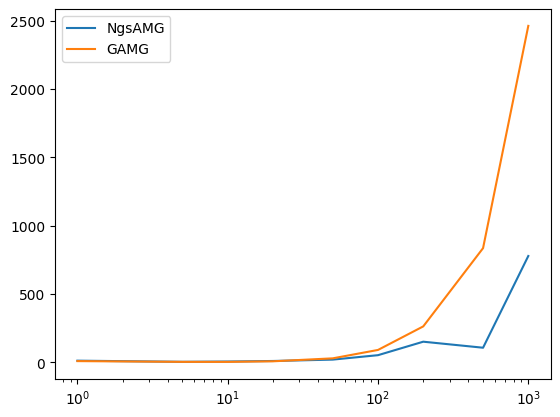

In [11]:
%%px
if MPI.COMM_WORLD.rank == 0:
    plt.semilogx(ratios, [x for x,y in kappas], label="NgsAMG")
    plt.semilogx(ratios, [y for x,y in kappas], label="GAMG")
    plt.legend()

#### Thin meshes mitigation

There are some options to improve robustness for thin regions
 * Use block-smoothers
 * Experimental iterative improvement of prolongations (nut fully parallelized, YMMV)

In [12]:
%%px
extraArgs = { "ngs_amg_crs_alg":"spw", "ngs_amg_sm_type":"bgs", "ngs_amg_sp_improve_its":2, "ngs_amg_sp_omega":0.8 }

ratios = [1,5,10,20,50,100,200,500,1000]
kappas = [ getKappas(r, extraArgs) for r in ratios ]

[stderr:1]  WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!


[stdout:0] Set up AMG-levels...
 map maps 36 -> 6, fac 0.166667
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.16667
Operator complexity: 1.24894
Vertex complexity components: 1 0.166667 
Operator complexity components: 1 0.248936 
# vertices 36 6 
# edges: 85 10 
# procs: 4 2 
NZEs:235 26 
 ---------- AMG Summary End ---------- 

PETSc GAMG setup = 0.0026363001685682083
aspect ratio = 1, kappa NGS = 10.85927564100583, kappa PETSc = 8.525493335717888
Set up AMG-levels...
 map maps 156 -> 23, fac 0.147436
Done setting up AMG-levels!

 ---------- AMG Summary ---------- 
Vertex complexity: 1.14744
Operator complexity: 1.3887
Vertex complexity components: 1 0.147436 
Operator complexity components: 1 0.388697 
# vertices 156 23 
# edges: 405 46 
# procs: 4 2 
NZEs:1013 175 
 ---------- AMG Summary End ---------- 

PETSc GAMG setup = 0.0036505234056150074
aspect ratio = 5, kappa NGS = 2.4348081310007426, kappa PETSc = 3.0612577043038884
Set up AMG-leve

[stderr:2]  WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!


[stderr:3]  WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!


[stderr:0]  WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!
 WARNING!! sp_improve_its option is not fully parallelized!


[output:0]

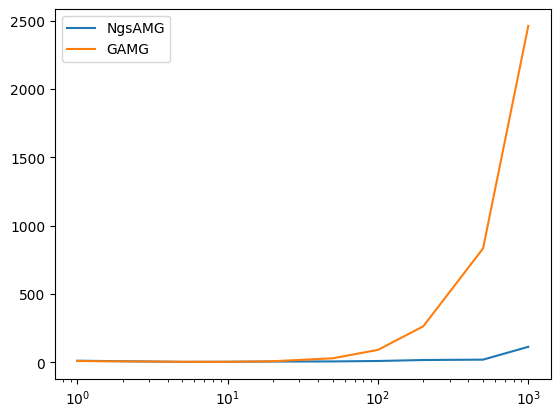

In [13]:
%%px
if MPI.COMM_WORLD.rank == 0:
    plt.semilogx(ratios, [x for x,y in kappas], label="NgsAMG")
    plt.semilogx(ratios, [y for x,y in kappas], label="GAMG")
    plt.legend()